## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Nombre y Apellido: Humberto Delgado

***
## Ventanas


<div class="alert alert-block alert-info">
<b>1)</b> Implemente las funciones para generar las siguientes ventanas $w(k)$:

</div>

+ Bartlett ó triangular
+ Hann
+ Blackman
+ Flat-top



<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede consultar el capítulo 6.3 del libro de B. Porat para obtener las expresiones analíticas de cada ventana.

</div>

   a) Para cada ventana grafique $w(k)$ y el módulo de su espectro $ \lvert W(\Omega) \rvert $


<div class="alert alert-block alert-warning">
<img src="./ojo.svg" align="left" width="50" />  Normalice la amplitud máxima de todas las ventanas a 0 dB.
</div>

In [1]:
## Inicialización del Notebook del TP2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from pandas import DataFrame
from IPython.display import HTML

N  = 1000 # muestras
fs = 1000 # Hz

# Insertar aquí el código para inicializar tu notebook
########################################################
from scipy import signal

#Definición de mi función DFT***

def DFT(señal, N=10):
    temp=0
    
    n=np.arange(señal.size).flatten()
    Xm=np.array([],dtype=np.complex128).flatten()  #array(vacio) 1D tipo complejo

    for m1 in np.arange(N):   #lazo for para cada componente espectral
       
        temp =np.sum( señal*(np.cos(2*np.pi*n*m1/N) + 1j*np.sin(2*np.pi*n*m1/N)))      
        Xm=np.hstack((Xm,temp))    #apilo valores horizontalmente 
    
    return Xm

####################################
#                                  #
#  Definición generador senoidal   #
#                                  #
####################################

def generador_senoidal (fs=4, f0=1, N=1000, a0=1, p0=0, dc=0):
    """ 
    
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """    

    # comienzo de la función
    Ts=1/fs  #tiempo de muestreo
    
   
     #grilla eje temporal

    tt=np.linspace(0, (N-1), N).flatten()
    
    signal=dc + a0*np.sin(2*np.pi*tt*f0*Ts + p0).flatten()

    
    
    # fin de la función
    
    return tt, signal

####################################
#                                  #
#          Definición ADC          #
#                                  #
####################################

def ADC(señal, config):
    
    if config['modo'] == 'simple':
        b = config['bits']             #bits del ADC
        cuentas=2**b                   #canitdad de cuentas
        q=config['vref+']/cuentas      
        muestra=señal*(1/q)            #paso la señal a cuentas             
        
        Cuantificado = np.around(muestra)*q  #cuantificaciòn,redondeo al
                                             #entero de la cuenta mas cercana 
        
        return Cuantificado,q
        
    elif config['modo'] == 'doble':
        b = config['bits']
        cuentas = 2**b    
        q= (config['vref+']-config['vref-'])/cuentas
        muestra=señal*(1/q)
        Cuantificado = np.around(muestra)*q
        
        return Cuantificado,q

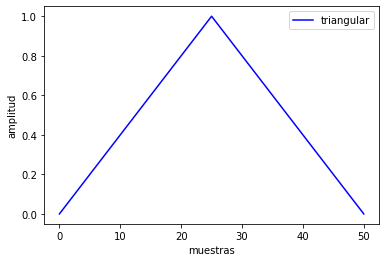

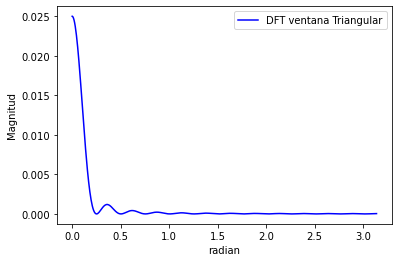

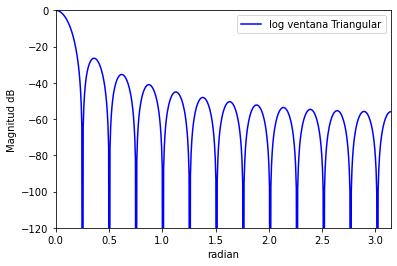

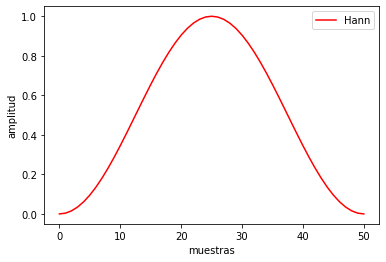

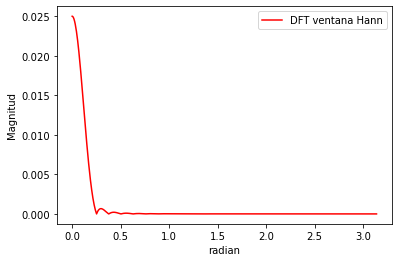

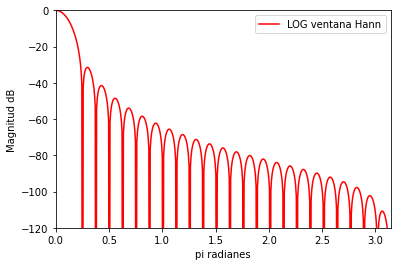

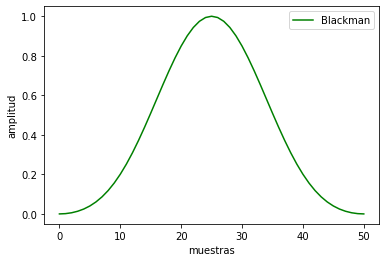

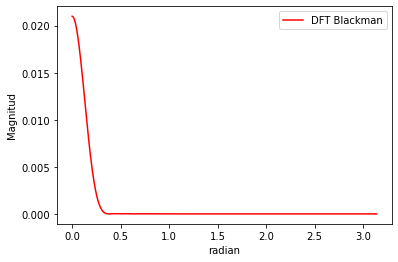

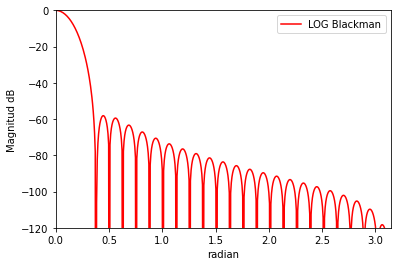

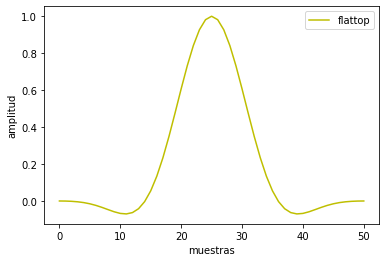

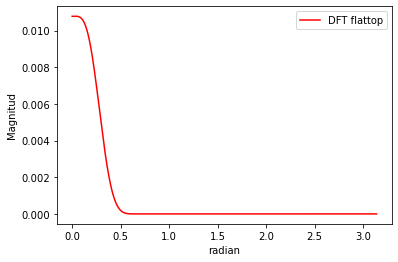

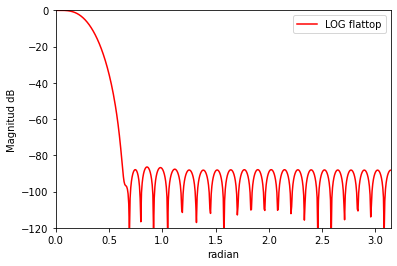

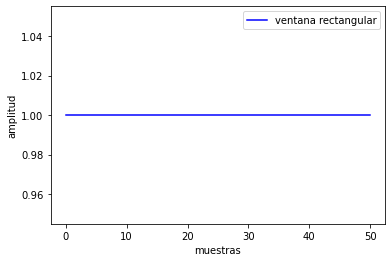

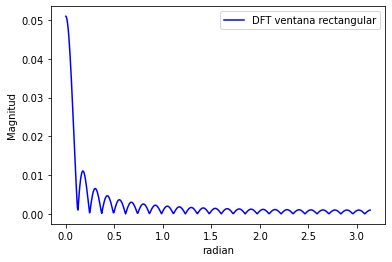

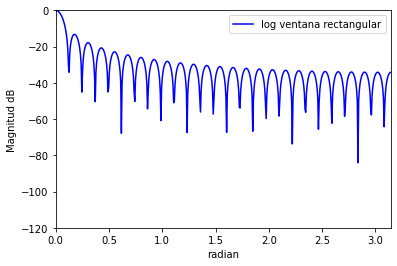

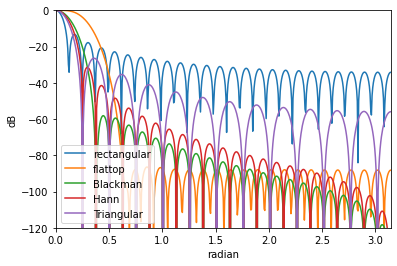

In [24]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
N=1000
n=np.arange(0,N)
FS=1000
TS=1/FS
w=2*np.pi/N
wn=np.linspace(0,2*np.pi,N)


Wtriang = signal.bartlett(51)
nt=np.arange(len(Wtriang))
plt.figure(1)
plt.plot(nt,Wtriang,'b',label='triangular')
plt.ylabel('amplitud')
plt.xlabel('muestras')
plt.legend()

Xtrian=DFT(Wtriang,1000)/1000
Xt=np.abs(Xtrian)
Xdb=20*np.log10(Xt/Xt[0])
xnt=np.linspace(0,2*np.pi,Xt.size)
xnn=np.arange(Xt.size)
plt.figure(2)
plt.plot(xnt[0:500],Xt[0:500],'b',label='DFT ventana Triangular')
plt.ylabel('Magnitud')
plt.xlabel('radian')
plt.legend()
plt.figure(3)
plt.plot(xnt,Xdb,'b',label='log ventana Triangular')
plt.axis([0,np.pi,-120,0])
plt.ylabel('Magnitud dB')
plt.xlabel('radian')
plt.legend()


WHann = signal.hann(51)
nh=np.arange(len(WHann))
Xhann=DFT(WHann,N=1000)/1000
Xh=abs(Xhann)
xnh=np.linspace(0,2*np.pi,Xhann.size)
Xhdb=20*np.log10(Xh/Xh[0])
plt.figure(4)
plt.plot(nh, WHann,'r',label='Hann')
plt.ylabel('amplitud')
plt.xlabel('muestras')
plt.legend()
plt.figure(5)
plt.plot(xnh[0:500],Xh[0:500],'r',label='DFT ventana Hann')
plt.ylabel('Magnitud')
plt.xlabel('radian')
plt.legend()
plt.figure(6)
plt.plot(xnh,Xhdb,'r',label='LOG ventana Hann')
plt.ylabel('Magnitud dB')
plt.xlabel('pi radianes')
plt.axis([0,np.pi,-120,0])
plt.legend()




WBlack = signal.blackman(51)
nb=np.arange(len(WBlack))
Xblack=DFT(WBlack,N)/N
Xb=abs(Xblack)
xnb=np.linspace(0,2*np.pi,Xb.size)
Xbdb=20*np.log10(Xb/Xb[0])
plt.figure(7)
plt.plot(nb, WBlack,'g',label='Blackman')
plt.ylabel('amplitud')
plt.xlabel('muestras')
plt.legend()
plt.figure(8)
plt.plot(xnb[0:500],Xb[0:500],'r',label='DFT Blackman')
plt.ylabel('Magnitud')
plt.xlabel('radian')
plt.legend()
plt.figure(9)
plt.plot(xnb,Xbdb,'r',label='LOG Blackman')
plt.ylabel('Magnitud dB')
plt.xlabel('radian')
plt.axis([0,np.pi,-120,0])
plt.legend()


WFlat = signal.flattop(51)
nf=np.arange(len(WFlat))
Xflat=DFT(WFlat,N)/N
Xf=abs(Xflat)
xnf=np.linspace(0,2*np.pi,Xf.size)
Xfdb=20*np.log10(Xf/Xf[0])
plt.figure(10)
plt.plot(nf, WFlat,'y',label='flattop')
plt.ylabel('amplitud')
plt.xlabel('muestras')
plt.legend()
plt.figure(11)
plt.plot(xnf[0:500],Xf[0:500],'r',label='DFT flattop')
plt.ylabel('Magnitud')
plt.xlabel('radian')
plt.legend()
plt.figure(12)
plt.plot(xnf,Xfdb,'r',label='LOG flattop')
plt.ylabel('Magnitud dB')
plt.xlabel('radian')
plt.axis([0,np.pi,-120,0])
plt.legend()


Wrect = signal.boxcar(51)
nr=np.arange(len(Wrect))
plt.figure(13)
plt.plot(nr,Wrect,'-b',label='ventana rectangular')
plt.ylabel('amplitud')
plt.xlabel('muestras')
plt.legend()

Xrect=DFT(Wrect,1000)/1000
Xr=np.abs(Xrect)
Xrdb=20*np.log10(Xr/Xr[0])
xrn=np.linspace(0,2*np.pi,Xrect.size)
plt.figure(14)
plt.plot(xrn[0:500],Xr[0:500],'b',label='DFT ventana rectangular')
plt.ylabel('Magnitud')
plt.xlabel('radian')
plt.legend()
plt.figure(15)
plt.plot(xrn,Xrdb,'b',label='log ventana rectangular')
plt.axis([0,np.pi,-120,0])
plt.ylabel('Magnitud dB')
plt.xlabel('radian')
plt.legend()
plt.figure(16)
plt.plot(xrn,Xrdb,label='rectangular')
plt.plot(xnf,Xfdb,label='flattop')
plt.plot(xnb,Xbdb,label='Blackman')
plt.plot(xnh,Xhdb,label='Hann')
plt.plot(xnt,Xdb, label='Triangular')
plt.axis([0,np.pi,-120,0])
plt.ylabel('dB')
plt.xlabel('radian')
plt.legend()


b) Construya una tabla en la que figure la anchura normalizada del lóbulo principal  de la ventana, $\Omega_1$, siendo 

$$ \lvert W(\Omega_1) \rvert = \frac{\sqrt{2}}{2}$$ 

y el valor de transferencia máxima de los lóbulos secundarios expresado en dB 

$$ W_2 = \mathop{max} \{\lvert W(\Omega) \rvert\} ,\space\space \forall \space \Omega \geq \Omega_0 $$

siendo $\Omega_0$ la frecuencia del primer cruce por cero $\lvert W(\Omega) \rvert\ = 0$ ó la frecuencia límite superior del lóbulo principal. Utilice como norma de frecuencia la frecuencia de Nyquist, de manera que las mediciones de frecuencias sean adimensionales y comparables independientemente de la frecuencia de muestreo.

In [3]:

#######################################
# Tu simulación que genere resultados #
#######################################
#w=2pi/N resolución espectral normalizada en radianes

#triangular

Xdbws=Xdb[0:500] #copio hasta fs/2 o pi el espectro de modulos
xt3=Xdbws>-3     #me fijo que valores son mayor a -3dB
t3=Xdbws[xt3]    #Así guardo esos valores en una variable
wt3=(len(t3)-1)*w#calculo la cantidad de bins mayores a -3dB y multiplico
                 #la cantidad de bin por la resolución espectral para 
                 #calcular W para -3db


#hann

Xhdbws=Xhdb[0:500]
xh3=Xhdbws>-3
h3=Xhdbws[xh3]
wh3=(len(h3)-1)*w#multiplico el bin por la resolución
#Blackman

Xbdbws=Xbdb[0:500]
xb3=Xbdbws>-3
b3=Xbdbws[xb3]
wb3=(len(b3)-1)*w#multiplico el bin por la resolución
#flattop

Xfdbws=Xfdb[0:500]
xf3=Xfdbws>-3
f3=Xhdbws[xf3]
wf3=(len(f3)-1)*w#multiplico el bin por la resolución
#rectangular

Xrdbws=Xrdb[0:500]
xr3=Xrdbws>-3
r3=Xhdbws[xr3]
wr3=(len(r3)-1)*w#multiplico el bin por la resolución

#El Calculo de la transferencia de W2 sale de los grafico de QT con spyder


tus_resultados = [ 
                   [wr3, '-13.2 dB'], # <-- acá debería haber numeritos :)
                   [wt3, '-26.5 dB'], # <-- acá debería haber numeritos :)
                   [wh3, '-31.6 dB'], # <-- acá debería haber numeritos :)
                   [wb3, '-58   dB'], # <-- acá debería haber numeritos :)
                   [wf3, '-87.9 dB'] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$f_1$ (radian)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$f_1$ (radian),$W_2$ (dB)
Rectangular,0.050265,-13.2 dB
Bartlett,0.075398,-26.5 dB
Hann,0.087965,-31.6 dB
Blackman,0.100531,-58 dB
Flat-top,0.232478,-87.9 dB


<div class="alert alert-block alert-info">
<b>2)</b> Genere una señal bitonal de las siguientes características
</div>


  $  x(k) = x_1(k) + x_2(k) $

  $  x_1(k) = sen(\Omega_1·k)$

  $  x_2(k) = a_2 · sen(\Omega_2·k)   $

siendo 

  $\Omega_1 = \frac{\pi}{2}$

  $\Omega_2 = \Omega_1 + 10·\frac{2\pi}{N}$

  $a_2 = -40$ dB


Responda a las siguientes consignas:

<div class="alert alert-block alert-info">
<b>2.a)</b>  Calcule el espectro $ \lvert X(\Omega) \rvert $

</div>

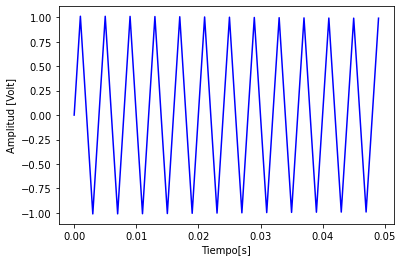

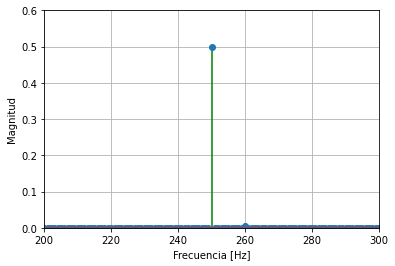

In [4]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
N=1000
fs=1000
ts=1/fs
df=1000/N
a1=1
a2=0.01        #-40db con respecto a a1      
f1=fs/4        #para w normalizada pi/2
f2=f1 + 10*df  #me corro 10 bins de w1 


x1,w1=generador_senoidal (fs=fs, f0=f1, N=1000, a0=a1, p0=0)

x2,w2=generador_senoidal (fs=fs, f0=f2, N=1000, a0=a2, p0=0)
w= w1 + w2
plt.figure()
plt.plot(x1[0:50]*ts,w[0:50],'b')
plt.xlabel('Tiempo[s]')
plt.ylabel('Amplitud [Volt]')
dftw=DFT(w,N)
Xw=abs(dftw)/N
Xwdb=20*np.log10(Xw)
m=np.arange(0,Xw.size)

plt.figure()
plt.stem(m,Xw,'g',use_line_collection=True)
plt.axis([200,300,0,0.6])
plt.ylabel('Magnitud')
plt.xlabel('Frecuencia [Hz]')
plt.grid()


<div class="alert alert-block alert-info">
<b>2.b)</b> Repita a) disminuyendo la amplitud de $x_2$.
</div>

¿Cuál es el factor de escala mínimo de $x_2$, definido como $a^0_2$, que permite evidenciar su existencia en el espectro de $\lvert X(\Omega) \rvert$ ?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> El factor de escala es de 0.01 de a1 .
</div>

¿De qué depende poder medir $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Depende del tipo de escala que usemos para medir la magnitud, si usamos una escala logaritmica podemos medir mejor valores muy alto con valores pequeños de magintud en le mismo gráfico.Por ejemplo en el gráfico de abajo x2 con un factor de 0.001 no se puede medir con la escala lineal de X , pero sí en el gráfico logaritmico.
</div>

Considere ahora que esta señal proviene de un ADC de 16 bits. Incorpore al análisis el correspondiente ruido de cuantización. ¿Cómo afecta esta situación la medición de $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Con la cuantización de 16bits de la señal se asoma el ruido de cuantizacion a valores cercanos a X2 lo que dificulta distinguirla del ruido si X2 presenta una magnitud del mismo orden . Tambien para este caso considerando que nuestra señal X1 abarca el rango dinamico total del ADC, se cumple para X1 la siguiente formula SNR=Pseñal[dB]-Pruido[dB]=6.02*b + 1.76dB = 98.8dB, donde b=16bits.Y si queremos detectar por ejemplo X2 a una determinada SNR podriamos utilizar la formula anterior y despejar la cantidad de bits que debe terner en el ADC, siempre y cuando acomodemos previamente mediante electronica la señal X2 al rando dinamico del ADC.     
</div>

<ipython-input-5-e61308f75b96>:41: RuntimeWarning: divide by zero encountered in log10
  Xwcdb=20*np.log10(Xwc)


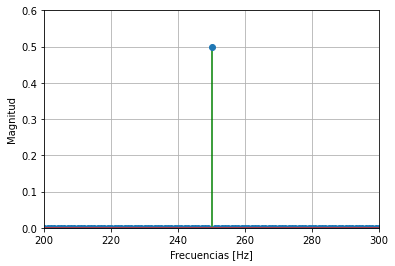

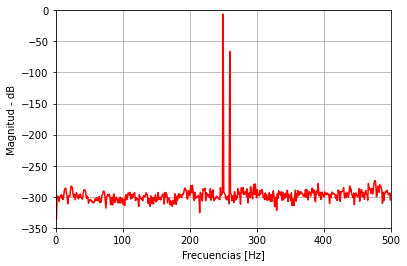

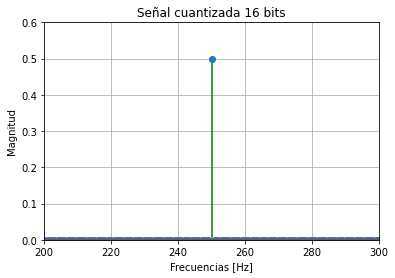

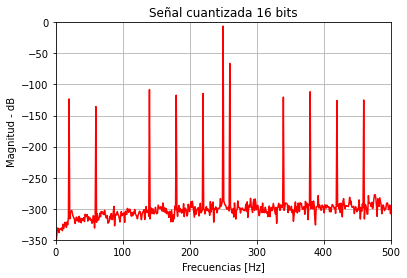

In [5]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
a2=1*10**(-3) #0.001

x2,w2=generador_senoidal (fs=fs, f0=f2, N=1000, a0=a2, p0=0)
w= w1 + w2

dftw=DFT(w,N)
Xw=abs(dftw)/N
Xwdb=20*np.log10(Xw)
m=np.arange(0,Xw.size)

plt.figure(17)
plt.stem(m,Xw,'g',use_line_collection=True)
plt.ylabel('Magnitud')
plt.xlabel('Frecuencias [Hz]')
plt.axis([200,300,0,0.6])
plt.grid()
plt.figure(18)
plt.plot(m,Xwdb,'red')
plt.ylabel('Magnitud - dB')
plt.xlabel('Frecuencias [Hz]')
plt.axis([0,500,-350,0])
plt.grid()



Cfg_ADC={'bits' : 16,
         'vref+' : 1,
         'vref-': -1,
         'bias':0,
         'modo':'doble',#modo "doble" para las vref+ y vref-"simple" Vref+
         
         }

wc,Q16=ADC(w,Cfg_ADC)

dftwc=DFT(wc,N)
Xwc=abs(dftwc)/N
Xwcdb=20*np.log10(Xwc)
mc=np.arange(0,Xwc.size)
plt.figure(19)
plt.title('Señal cuantizada 16 bits')
plt.stem(mc,Xwc,'g',use_line_collection=True)
plt.ylabel('Magnitud')
plt.xlabel('Frecuencias [Hz]')
plt.axis([200,300,0,0.6])
plt.grid()
plt.figure(20)
plt.title('Señal cuantizada 16 bits')
plt.plot(mc,Xwcdb,'r')
plt.ylabel('Magnitud - dB')
plt.xlabel('Frecuencias [Hz]')
plt.axis([0,500,-350,0])
plt.grid()

<div class="alert alert-block alert-info">
<b>2.c)</b> Repita a) incrementando la frecuencia de $x_1$ para $\Omega_1 = \frac{\pi}{2} + d_1·\frac{2\pi}{N}$ para valores de $d_1 = (0,01; 0.25; 0.5)$. Aumente la amplitud de $a_2$ hasta que se evidencie sobre el leakage y construya una tabla con dicho valor para las 3 situaciones correspondientes a desintonías leve, moderada y máxima.
</div>

,$a_2$ (dB)
leve,-52
moderada,-44
máxima,-38.4


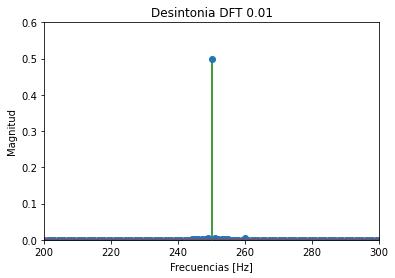

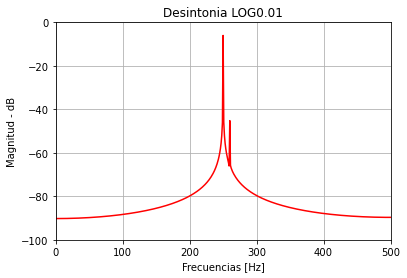

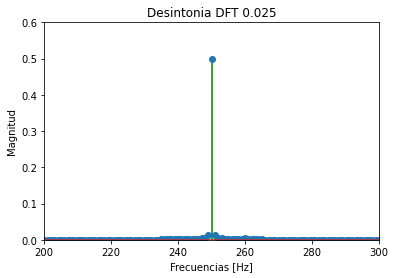

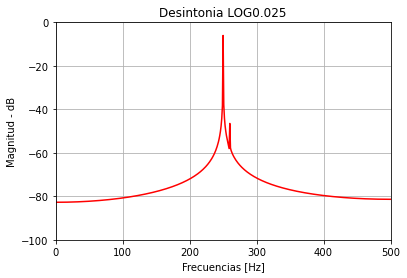

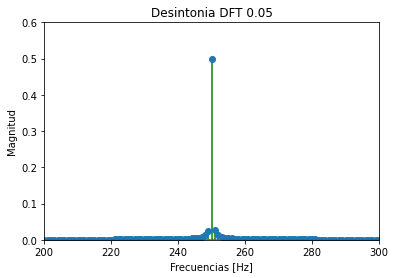

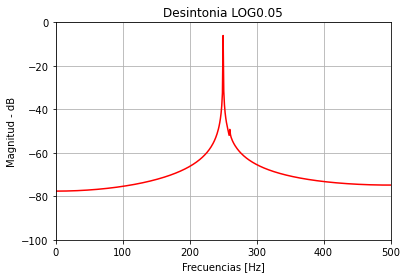

In [6]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
df=fs/N
a2=0.012

f1=fs/4
d1=np.array([0.01,0.025, 0.05])  #desintonia
f1d=f1 + d1*df
f2d= f1d + 10*df
wd1=np.array([],dtype=np.float64).reshape(1000,0)
wd2=np.array([],dtype=np.float64).reshape(1000,0)
for r in f1d:
    x1d,w1d=generador_senoidal (fs=fs, f0=r, N=1000, a0=a1, p0=0)
    wd1=np.hstack((wd1,w1d[:,np.newaxis]))
    f2d= r + 10*df
    x2d,w2d=generador_senoidal (fs=fs, f0=f2d, N=1000, a0=a2, p0=0)
    wd2=np.hstack((wd2,w2d[:,np.newaxis]))

wd=wd1+wd2

for r in range(0,3):
    
    dftwr=DFT(wd[:,r],N)
    Xwr=abs(dftwr)/N
    Xwrdb=20*np.log10(Xwr)
    mr=np.arange(0,Xwr.size)
    plt.figure()
    l='Desintonia DFT '+str(d1[r])
    plt.title(l)
    plt.stem(mr,Xwr,'g',use_line_collection=True)
    plt.ylabel('Magnitud')
    plt.xlabel('Frecuencias [Hz]')
    plt.axis([200,300,0,0.6])
    plt.figure()
    l='Desintonia LOG'+str(d1[r])
    plt.title(l)
    plt.plot(mr,Xwrdb,'red')
    plt.ylabel('Magnitud - dB')
    plt.xlabel('Frecuencias [Hz]')
    plt.axis([0,500,-100,0])
    plt.grid()
    

#######################################
# Tu simulación que genere resultados #
#######################################
#Los valores para los cuales a2 supera el ruido debido al leakage
#fueron calculado iterando sobre los gráficos hasta que el pico de x2
#sobrepasa el leakage de cada valor de d(0.01,0.25.0.5).

tus_resultados = [ 
                   '-52', # <-- acá debería haber numeritos :)
                   '-44', # <-- acá debería haber numeritos :)
                   '-38.4' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a_2$ (dB)'],
               index=[  
                        'leve',
                        'moderada',
                        'máxima',
                     ])
HTML(df.to_html())

<div class="alert alert-block alert-info">
<b>2.d)</b> Evalúe el efecto de utilizar las ventanas implementadas en 1). Complete la tabla comparativa con respecto a la ventana rectangular, respecto a las mediciones $a^0_2$ realizada en 2.b); y $a^1_2$ en 2.c) para el caso de desintonía máxima.
</div>

Grafique $\lvert X_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w(k) \} \rvert $ para las 4 ventanas de 1).

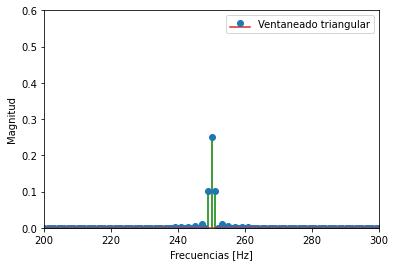

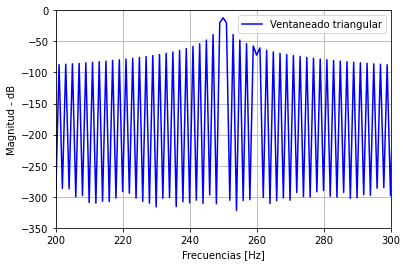

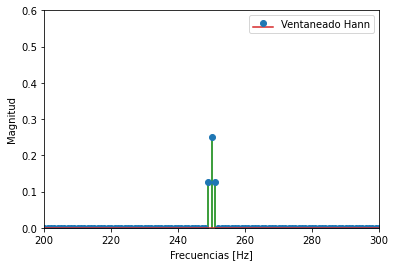

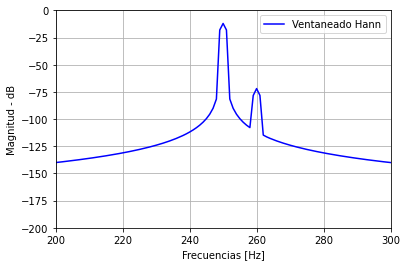

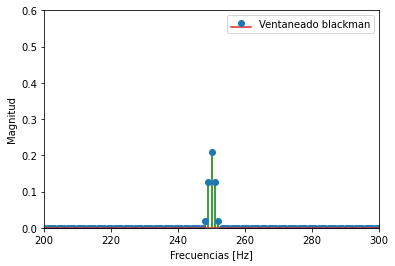

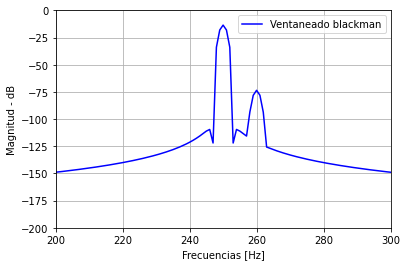

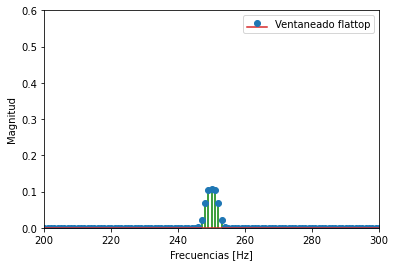

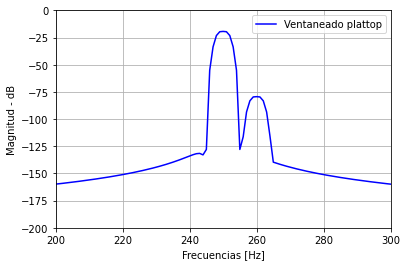

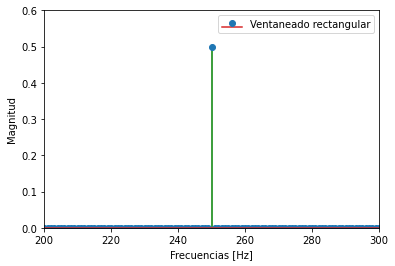

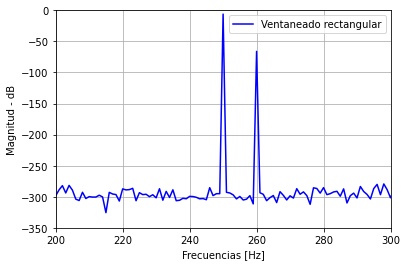

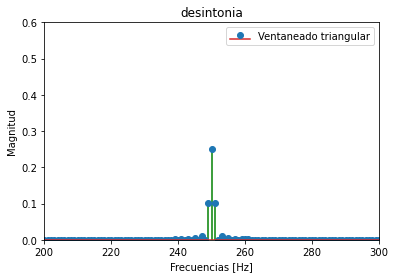

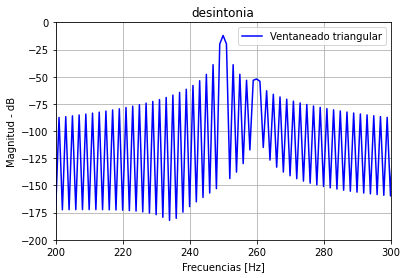

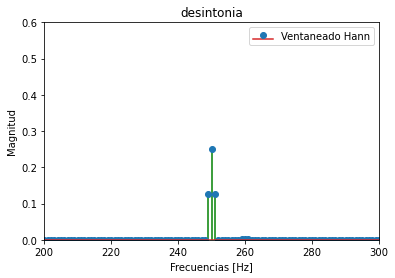

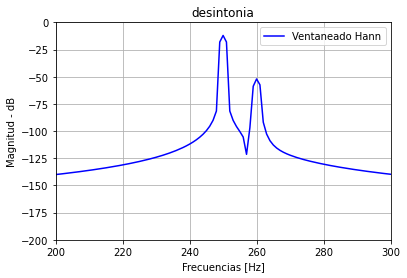

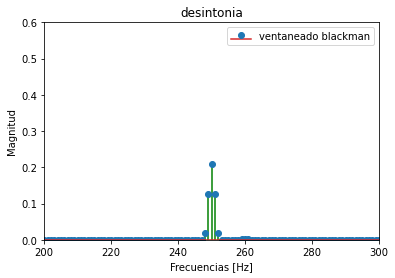

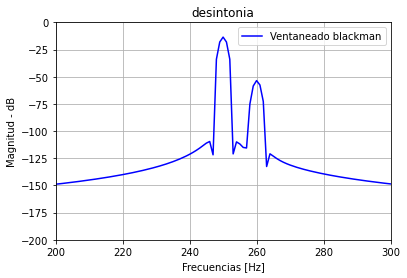

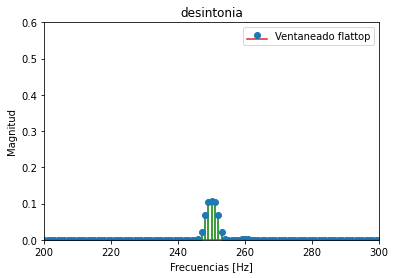

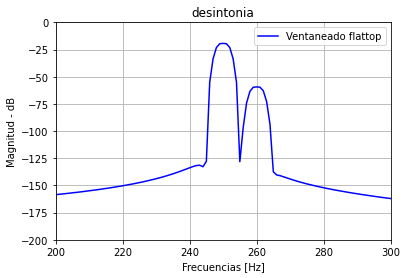

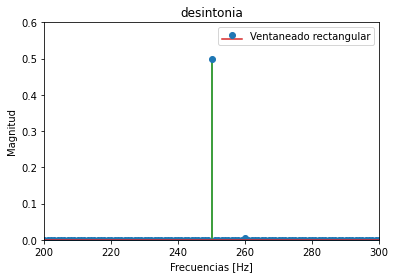

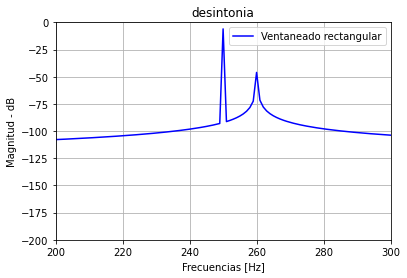

In [7]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

a2=0.01

Wtriang = signal.bartlett(1000)
nt=np.arange(len(Wtriang))
wt=w*Wtriang
dftwt=DFT(wt,N)
Xwt=abs(dftwt)/N
Xwtdb=20*np.log10(Xwt)
mt=np.arange(0,Xwt.size)
plt.figure()
plt.stem(mt,Xwt,'g',label='Ventaneado triangular',use_line_collection=True)
plt.axis([200,300,0,0.6])
plt.ylabel('Magnitud')
plt.xlabel('Frecuencias [Hz]')
plt.legend()
plt.figure()
plt.plot(mt,Xwtdb,'b',label='Ventaneado triangular')
plt.axis([200,300,-350,0])
plt.ylabel('Magnitud - dB')
plt.xlabel('Frecuencias [Hz]')
plt.grid()
plt.legend()
a20t=np.max(Xwtdb[255:265])

WHann = signal.hann(1000)
nh=np.arange(len(WHann))
wh=w*WHann
dftwh=DFT(wh,N)
Xwh=abs(dftwh)/N
Xwhdb=20*np.log10(Xwh)
mh=np.arange(0,Xwh.size)
plt.figure()
plt.stem(mh,Xwh,'g',label='Ventaneado Hann',use_line_collection=True)
plt.axis([200,300,0,0.6])
plt.ylabel('Magnitud')
plt.xlabel('Frecuencias [Hz]')
plt.legend()
plt.figure()
plt.plot(mh,Xwhdb,'b',label='Ventaneado Hann')
plt.axis([200,300,-200,0])
plt.ylabel('Magnitud - dB')
plt.xlabel('Frecuencias [Hz]')
plt.grid()
plt.legend()
a20h=np.max(Xwhdb[255:265])

WBlack = signal.blackman(1000)
nb=np.arange(len(WBlack))
wb=w*WBlack
dftwb=DFT(wb,N)
Xwb=abs(dftwb)/N
Xwbdb=20*np.log10(Xwb)
mb=np.arange(0,Xwb.size)
plt.figure()
plt.stem(mb,Xwb,'g',label='Ventaneado blackman',use_line_collection=True)
plt.axis([200,300,0,0.6])
plt.ylabel('Magnitud')
plt.xlabel('Frecuencias [Hz]')
plt.legend()
plt.figure()
plt.plot(mb,Xwbdb,'b',label='Ventaneado blackman')
plt.axis([200,300,-200,0])
plt.grid()
plt.ylabel('Magnitud - dB')
plt.xlabel('Frecuencias [Hz]')
plt.legend()
a20b=np.max(Xwbdb[255:265])

WFlat = signal.flattop(1000)
nf=np.arange(len(WFlat))
wf=w*WFlat
dftwf=DFT(wf,N)
Xwf=abs(dftwf)/N
Xwfdb=20*np.log10(Xwf)
mf=np.arange(0,Xwf.size)
plt.figure()
plt.stem(mf,Xwf,'g',label='Ventaneado flattop',use_line_collection=True)
plt.axis([200,300,0,0.6])
plt.ylabel('Magnitud')
plt.xlabel('Frecuencias [Hz]')
plt.legend()
plt.figure()
plt.plot(mf,Xwfdb,'b',label='Ventaneado plattop')
plt.axis([200,300,-200,0])
plt.grid()
plt.ylabel('Magnitud - dB')
plt.xlabel('Frecuencias [Hz]')
plt.legend()
a20f=np.max(Xwfdb[255:265])
       
Wrect=signal.boxcar(1000)
nr=np.arange(len(Wrect))
wr=w*Wrect
dftwr=DFT(wr,N)
Xwr=abs(dftwr)/N
Xwrdb=20*np.log10(Xwr)
mr=np.arange(0,Xwr.size)
plt.figure()
plt.stem(mr,Xwr,'g',label='Ventaneado rectangular',use_line_collection=True)
plt.axis([200,300,0,0.6])
plt.ylabel('Magnitud')
plt.xlabel('Frecuencias [Hz]')
plt.legend()
plt.figure()
plt.plot(mr,Xwrdb,'b',label='Ventaneado rectangular')
plt.axis([200,300,-350,0])
plt.grid()
plt.ylabel('Magnitud - dB')
plt.xlabel('Frecuencias [Hz]')
plt.legend()
a20r=np.max(Xwrdb[255:265])



#Cálculo para Desintonía máxima 0.05



dmax=0.05
rs=fs/N
f1d=f1 + dmax*rs
f2max= f1d + 10*rs
x2max,w2max=generador_senoidal(fs=fs, f0=f2max, N=1000, a0=a2, p0=0)
wdm=w1 + w2max

Wtriang = signal.bartlett(1000)
nt=np.arange(len(Wtriang))
wt=wdm*Wtriang
dftwt=DFT(wt,N)
Xwt=abs(dftwt)/N
Xwtdb=20*np.log10(Xwt)
mt=np.arange(0,Xwt.size)
plt.figure()
plt.title('desintonia')
plt.stem(mt,Xwt,'g',label='Ventaneado triangular',use_line_collection=True)
plt.axis([200,300,0,0.6])
plt.ylabel('Magnitud')
plt.xlabel('Frecuencias [Hz]')
plt.legend()
plt.figure()
plt.title('desintonia')
plt.plot(mt,Xwtdb,'b',label='Ventaneado triangular')
plt.axis([200,300,-200,0])
plt.grid()
plt.ylabel('Magnitud - dB')
plt.xlabel('Frecuencias [Hz]')
plt.legend()
a21t=np.max(Xwtdb[255:265])

WHann = signal.hann(1000)
nh=np.arange(len(WHann))
wh=wdm*WHann
dftwh=DFT(wh,N)
Xwh=abs(dftwh)/N
Xwhdb=20*np.log10(Xwh)
mh=np.arange(0,Xwh.size)
plt.figure()
plt.title('desintonia')
plt.stem(mh,Xwh,'g',label='Ventaneado Hann',use_line_collection=True)
plt.axis([200,300,0,0.6])
plt.ylabel('Magnitud')
plt.xlabel('Frecuencias [Hz]')
plt.legend()
plt.figure()
plt.title('desintonia')
plt.plot(mh,Xwhdb,'b',label='Ventaneado Hann')
plt.axis([200,300,-200,0])
plt.grid()
plt.ylabel('Magnitud - dB')
plt.xlabel('Frecuencias [Hz]')
plt.legend()
a21h=np.max(Xwhdb[255:265])

WBlack = signal.blackman(1000)
nb=np.arange(WBlack.size)
wb=wdm*WBlack
dftwb=DFT(wb,N)
Xwb=abs(dftwb)/N
Xwbdb=20*np.log10(Xwb)
mb=np.arange(0,Xwb.size)
plt.figure()
plt.title('desintonia')
plt.stem(mb,Xwb,'g',label='ventaneado blackman',use_line_collection=True)
plt.axis([200,300,0,0.6])
plt.ylabel('Magnitud')
plt.xlabel('Frecuencias [Hz]')
plt.legend()
plt.figure()
plt.title('desintonia')
plt.plot(mb,Xwbdb,'b',label='Ventaneado blackman')
plt.axis([200,300,-200,0])
plt.grid()
plt.ylabel('Magnitud - dB')
plt.xlabel('Frecuencias [Hz]')
plt.legend()
a21b=np.max(Xwbdb[255:265])

WFlat = signal.flattop(1000)
nf=np.arange(len(WFlat))
wf=wdm*WFlat
dftwf=DFT(wf,N)
Xwf=abs(dftwf)/N
Xwfdb=20*np.log10(Xwf)
mf=np.arange(0,Xwf.size)
plt.figure()
plt.title('desintonia')
plt.stem(mf,Xwf,'g',label='Ventaneado flattop',use_line_collection=True)
plt.axis([200,300,0,0.6])
plt.ylabel('Magnitud')
plt.xlabel('Frecuencias [Hz]')
plt.legend()
plt.figure()
plt.title('desintonia')
plt.plot(mf,Xwfdb,'b',label='Ventaneado flattop')
plt.axis([200,300,-200,0])
plt.grid()
plt.ylabel('Magnitud - dB')
plt.xlabel('Frecuencias [Hz]')
plt.legend()
a21f=np.max(Xwfdb[255:265])

Wrect = signal.boxcar(1000)
nr=np.arange(len(Wrect))
wr=wdm*Wrect
dftwr=DFT(wr,N)
Xwr=abs(dftwr)/N
Xwrdb=20*np.log10(Xwr)
mr=np.arange(0,Xwr.size)
plt.figure()
plt.title('desintonia')
plt.stem(mr,Xwr,'g',label='Ventaneado rectangular',use_line_collection=True)
plt.axis([200,300,0,0.6])
plt.ylabel('Magnitud')
plt.xlabel('Frecuencias [Hz]')
plt.legend()
plt.figure()
plt.title('desintonia')
plt.plot(mr,Xwrdb,'b',label='Ventaneado rectangular')
plt.axis([200,300,-200,0])
plt.grid()
plt.ylabel('Magnitud - dB')
plt.xlabel('Frecuencias [Hz]')
plt.legend()
a21r=np.max(Xwrdb[255:265])

In [8]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   [a20r, a21r], # <-- acá debería haber numeritos :)
                   [a20t, a21t], # <-- acá debería haber numeritos :)
                   [a20h, a21h], # <-- acá debería haber numeritos :)
                   [a20b, a21b], # <-- acá debería haber numeritos :)
                   [a20f, a21f] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a^0_2$ (dB)','$a^1_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$a^0_2$ (dB),$a^1_2$ (dB)
Rectangular,-66.020600,-46.056688
Bartlett,-47.827785,-47.752798
Hann,-71.962388,-52.055130
Blackman,-73.528785,-53.571649
Flat-top,-79.373399,-59.358634


<div class="alert alert-block alert-info">
<b>2.e)</b> Para las ventanas analizadas en 1), decida cuál sería la más apropiada en el caso que, <b>sin afectar otro parámetro</b>, $\Omega_2$ pudiera acercarse libremente a $\Omega_1 = \frac{\pi}{2} + 0.5·\frac{2\pi}{N}$. Complete la siguiente tabla con la distancia mínima, $\Omega_0, $ a la que se puede distinguir $x_2$ en $\lvert X_w(\Omega) \rvert$.
</div>

In [9]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\Omega_0$ (#)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$\Omega_0$ (#)
Rectangular,
Bartlett,
Hann,
Blackman,
Flat-top,


<div class="alert alert-block alert-info">
<b>3)</b> Genere la siguiente señal 

</div>

  $  x(k) = a_0·\mathop{sen}(\Omega_1·k)$


siendo 

  $a_0 = 2$

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y la variable aleatoria definida por

  $f_r \sim \mathcal{U}(-2, \, 2) $

Considere 200 realizaciones para cada experimento requerido en los siguiente incisos.


<div class="alert alert-block alert-info">
<b>3.a)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

 
  $ \hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$
  
siendo

  $\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert $ 
  
para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

El sesgo y la varianza se definen para este caso como

  $ s_a = \mathop{E}\{ \hat{a_0}\} - a_0  $
    
  $ v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \} $
  
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales ($a=a_0$ para simplificar la notación)

  $ \mathop{E}\{ \hat{a_0}\}  = \hat{\mu_a} =  \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}} $
  
  $ s_a = \hat{\mu_a} - a  $
    
  $ v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2 $



Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

(0.0, 1.0)

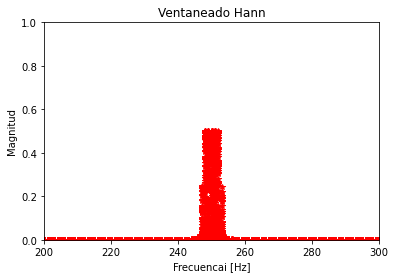

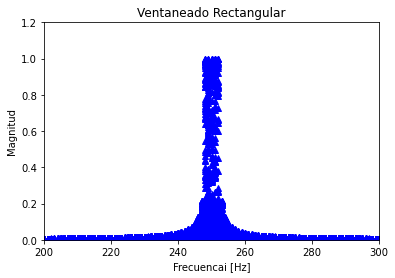

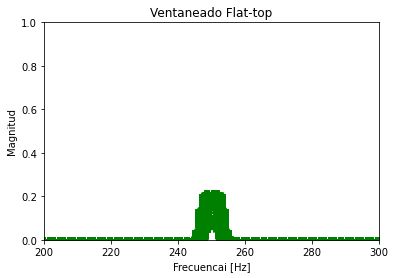

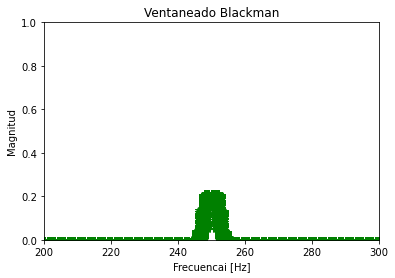

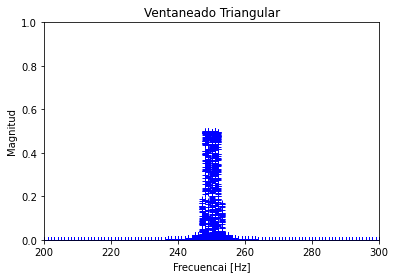

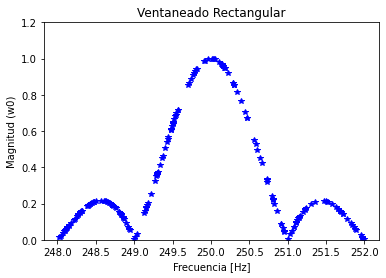

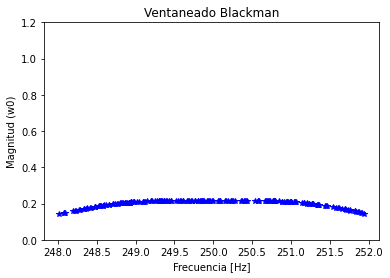

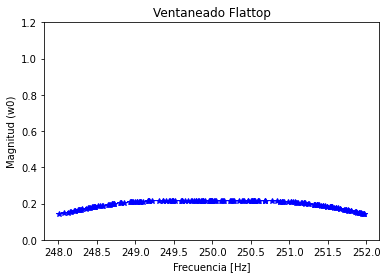

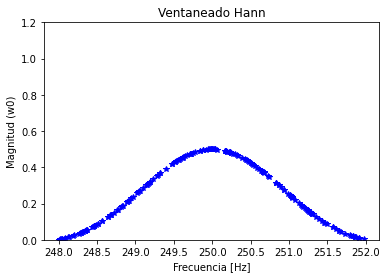

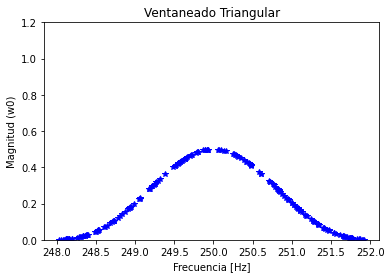

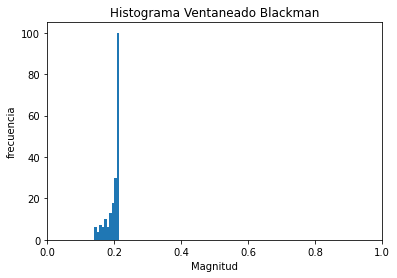

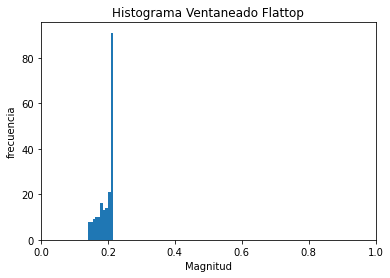

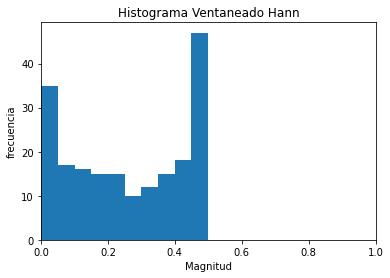

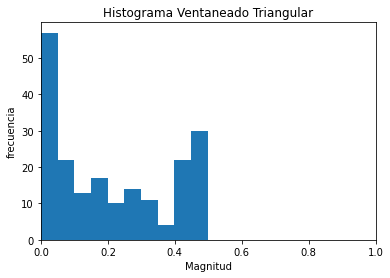

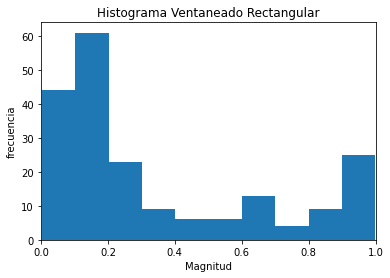

In [16]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
a0=2

w0=fs/4



WHann = signal.hann(1000)
nh=np.arange(0,WHann.size)
fr=np.random.default_rng().uniform(-2,2,200)
Hh=np.array([],dtype=np.float64).reshape(1000,0)
w1h= w0 + fr*rs
for r in w1h:
    
    x,yh = generador_senoidal(fs=fs, f0=r, N=1000, a0=a0, p0=0)
    Yhv = WHann*yh
    Yhdft=DFT(Yhv,N=1000)/1000
    XYhv=abs(Yhdft)
    Hh =np.hstack((Hh, XYhv[:,np.newaxis]))
   


plt.figure(18)
plt.plot(nh,Hh,'r*')
plt.title('Ventaneado Hann')
plt.ylabel('Magnitud')
plt.xlabel('Frecuencai [Hz]')
plt.axis([200,300,0,1])

Wrect = signal.boxcar(1000)
nr=np.arange(0,Wrect.size)    
fr1=np.random.default_rng().uniform(-2,2,200)
Hr=np.array([],dtype=np.float64).reshape(1000,0)
w1r= w0 + fr1*rs
for r in w1r:
    
    xr,yr=generador_senoidal(fs=fs, f0=r, N=1000, a0=a0, p0=0)
    Yrv = yr*Wrect
    Yrdft=DFT(Yrv,N=1000)/1000
    XYrv=abs(Yrdft)
    Hr = np.hstack((Hr, XYrv[:,np.newaxis]))


plt.figure(19)
plt.plot(nr, Hr,'b^')
plt.title('Ventaneado Rectangular')
plt.ylabel('Magnitud')
plt.xlabel('Frecuencai [Hz]')
plt.axis([200,300,0,1.2])

WFlat = signal.flattop(1000)
nf=np.arange(0,WFlat.size)    
fr2=np.random.default_rng().uniform(-2,2,200)
Hf=np.array([],dtype=np.float64).reshape(1000,0)
w1f= w0 + fr2*rs
for r in w1f:
    
    xf,yf=generador_senoidal(fs=fs, f0=r, N=1000, a0=a0, p0=0)
    Yfv = yf*WFlat
    Yfdft=DFT(Yfv,N=1000)/1000
    XYfv=abs(Yfdft)
    Hf = np.hstack((Hf, XYfv[:,np.newaxis]))


plt.figure(20)
plt.title('Ventaneado Flat-top')
plt.plot(nf, Hf,'g*')
plt.ylabel('Magnitud')
plt.xlabel('Frecuencai [Hz]')
plt.axis([200,300,0,1])

WBlack = signal.blackman(1000)
nb=np.arange(0,WBlack.size)    
fr3=np.random.default_rng().uniform(-2,2,200)
Hb=np.array([],dtype=np.float64).reshape(1000,0)
w1b= w0 + fr3*rs
for r in w1b:
    
    xb,yb=generador_senoidal(fs=fs, f0=r, N=1000, a0=a0, p0=0)
    Ybv = yb*WFlat
    Ybdft=DFT(Ybv,N=1000)/1000
    XYbv=abs(Ybdft)
    Hb = np.hstack((Hb, XYbv[:,np.newaxis]))


plt.figure(21)
plt.title('Ventaneado Blackman')
plt.plot(nb, Hb,'g*')
plt.ylabel('Magnitud')
plt.xlabel('Frecuencai [Hz]')
plt.axis([200,300,0,1])

Wtriang = signal.bartlett(1000)
nt=np.arange(0,Wtriang.size)    
fr4=np.random.default_rng().uniform(-2,2,200)
Ht=np.array([],dtype=np.float64).reshape(1000,0)
w1t= w0 + fr4*rs
for r in w1t:
    

    xt,yt=generador_senoidal(fs=fs, f0=r, N=1000, a0=a0, p0=0)
    Ytv = yt*Wtriang
    Ytdft=DFT(Ytv,N=1000)/1000
    XYtv=abs(Ytdft)
    Ht = np.hstack((Ht, XYtv[:,np.newaxis]))


plt.figure(22)
plt.title('Ventaneado Triangular')
plt.plot(nt, Ht,'b+')
plt.ylabel('Magnitud')
plt.xlabel('Frecuencai [Hz]')
plt.axis([200,300,0,1])

#Grafico Magnitud(w0) vs frecuencia 

A0r=(Hr[250][:]).copy()
plt.figure(23)
plt.title('Ventaneado Rectangular')
plt.plot(w1r,A0r,'b*')
plt.ylabel('Magnitud (w0)')
plt.xlabel('Frecuencia [Hz]')
plt.ylim(0,1.2)
A0b=(Hb[250][:]).copy()
plt.figure(24)
plt.title('Ventaneado Blackman')
plt.plot(w1b,A0b,'b*')
plt.ylabel('Magnitud (w0)')
plt.xlabel('Frecuencia [Hz]')
plt.ylim(0,1.2)
A0f=(Hf[250][:]).copy()
plt.figure(25)
plt.title('Ventaneado Flattop')
plt.plot(w1f,A0f,'b*')
plt.ylabel('Magnitud (w0)')
plt.xlabel('Frecuencia [Hz]')
plt.ylim(0,1.2)
A0h=(Hh[250][:]).copy()
plt.figure(26)
plt.title('Ventaneado Hann')
plt.plot(w1h,A0h,'b*')
plt.ylabel('Magnitud (w0)')
plt.xlabel('Frecuencia [Hz]')
plt.ylim(0,1.2)
A0t=(Ht[250][:]).copy()
plt.figure(27)
plt.title('Ventaneado Triangular')
plt.plot(w1t,A0t,'b*')
plt.ylabel('Magnitud (w0)')
plt.xlabel('Frecuencia [Hz]')
plt.ylim(0,1.2)

#Grafico de histogramas
#----------------------
plt.figure(28)
plt.title('Histograma Ventaneado Blackman')
plt.hist(Hb[250])
plt.ylabel('frecuencia')
plt.xlabel('Magnitud')
plt.xlim(0,1)
plt.figure(29)
plt.title('Histograma Ventaneado Flattop')
plt.hist(Hf[250])
plt.ylabel('frecuencia')
plt.xlabel('Magnitud')
plt.xlim(0,1)
plt.figure(30)
plt.title('Histograma Ventaneado Hann')
plt.hist(Hh[250])
plt.ylabel('frecuencia')
plt.xlabel('Magnitud')
plt.xlim(0,1)
plt.figure(31)
plt.title('Histograma Ventaneado Triangular')
plt.hist(Ht[250])
plt.ylabel('frecuencia')
plt.xlabel('Magnitud')
plt.xlim(0,1)
plt.figure(32)
plt.title('Histograma Ventaneado Rectangular')
plt.hist(Hr[250])
plt.ylabel('frecuencia')
plt.xlabel('Magnitud')
plt.xlim(0,1)

In [11]:

#######################################
# Tu simulación que genere resultados #
#######################################
#Calculo estimadores media y varianza
A=2

Htm=np.mean(Ht, axis=0) 
Hfm=np.mean(Hf, axis=0)
Hbm=np.mean(Hb, axis=0)
Hrm=np.mean(Hr, axis=0)
Hhm=np.mean(Hh, axis=0)

Uht=np.sum(Htm)/200
Uhf=np.sum(Hfm)/200
Uhb=np.sum(Hbm)/200
Uhr=np.sum(Hrm)/200
Uhh=np.sum(Hhm)/200


#Varianza

Vt=np.sum((Htm-Uht)**2)/200
Vf=np.sum((Hfm-Uhf)**2)/200
Vb=np.sum((Hbm-Uhb)**2)/200
Vr=np.sum((Hrm-Uhr)**2)/200
Vh=np.sum((Hhm-Uhh)**2)/200

#Sesgo

St=Uht-A
Sf=Uhf-A
Sb=Uhb-A
Sr=Uhr-A
Sh=Uhh-A
tus_resultados = [ 
                   [Sr, Vr], # <-- acá debería haber numeritos :)
                   [St, Vt], # <-- acá debería haber numeritos :)
                   [Sh, Vh], # <-- acá debería haber numeritos :)
                   [Sb, Vb], # <-- acá debería haber numeritos :)
                   [Sf, Vf], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,-1.993018,6.015753e-06
Bartlett,-1.998002,5.289924e-15
Hann,-1.997917,1.325045e-09
Blackman,-1.997999,2.347291e-13
Flat-top,-1.997999,2.267064e-13


<div class="alert alert-block alert-info">
<b>3.b)</b> Repita a) para el siguiente estimador:
</div>

 
  $ \hat{a_1} = \sqrt{\frac{1}{5}·\sum_{j=a}^{b} \lvert X^i_w(j) \rvert ^2} $
  
siendo $ a = \Omega_0 - 2·\frac{2\pi}{N} $ y $ b = \Omega_0 + 2·\frac{2\pi}{N} $

para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

(0.0, 1.0)

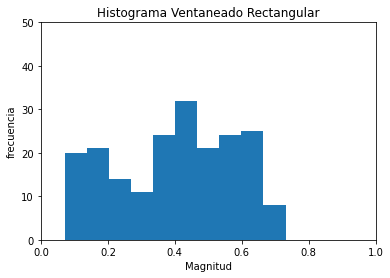

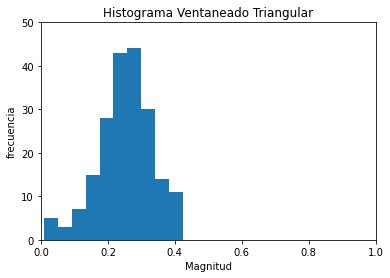

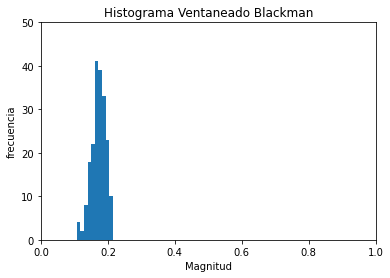

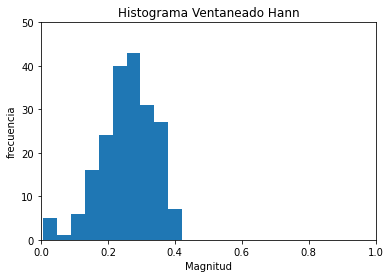

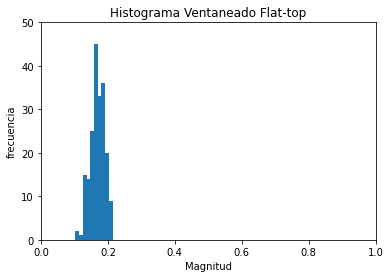

In [21]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

fs=1000

a= fs/4 - 2*rs
b= fs/4 + 3*rs
dab=np.arange(a,b,1)
Hh=np.array([],dtype=np.float64).reshape(1000,0)
Hr=np.array([],dtype=np.float64).reshape(1000,0)
Hb=np.array([],dtype=np.float64).reshape(1000,0)
Hf=np.array([],dtype=np.float64).reshape(1000,0)
Ht=np.array([],dtype=np.float64).reshape(1000,0)

for a in dab:
    WHann = signal.hann(1000)
    nh=np.arange(0,WHann.size)
    fra=np.random.default_rng().uniform(-2,2,200)
    Hha=np.array([],dtype=np.float64).reshape(1000,0)

    w1a= a + fra*rs
    for r in w1a:
    
        x,ya = generador_senoidal(fs=fs, f0=r, N=1000, a0=a0, p0=0) 
        Yva = WHann*ya
        Ydfta=DFT(Yva,N=1000)/1000
        XYva=abs(Ydfta)
        Hha =np.hstack((Hha, XYva[:,np.newaxis]))
       
    Hh=np.hstack((Hh,Hha))
    
    # plt.figure(23)
    # plt.plot(nh,Hha,'r*')
    # plt.axis([200,300,0,1])

    Wrect = signal.boxcar(1000)
    nr=np.arange(0,Wrect.size)    
    fr1a=np.random.default_rng().uniform(-2,2,200)
    Hra=np.array([],dtype=np.float64).reshape(1000,0)
    w1ra= a + fr1a*rs

    for r in w1ra:
    
        xr,yra = generador_senoidal(fs=fs, f0=r, N=1000, a0=a0, p0=0)
        Yrva = yra*Wrect
        Yrdfta=DFT(Yrva,N=1000)/1000
        XYrva=abs(Yrdfta)
        Hra = np.hstack((Hra, XYrva[:,np.newaxis]))

    Hr=np.hstack((Hr,Hra))
    
    # plt.figure(24)
    # plt.plot(nr, Hra,'b^')
    # plt.axis([200,300,0,1])

    WFlat = signal.flattop(1000)
    nf=np.arange(0,Wrect.size)    
    fr2a=np.random.default_rng().uniform(-2,2,200)
    Hfa=np.array([],dtype=np.float64).reshape(1000,0)
    w1fa= a + fr2a*rs

    for r in w1fa:
    
        xf,yfa = generador_senoidal(fs=fs, f0=r, N=1000, a0=a0, p0=0)
        Yfva = yfa*WFlat
        Yfdfta=DFT(Yfva,N=1000)/1000
        XYfva=abs(Yfdfta)
        Hfa = np.hstack((Hfa, XYfva[:,np.newaxis]))


    Hf=np.hstack((Hf,Hfa))

    # plt.figure(25)
    # plt.plot(nf, Hfa,'go')
    # plt.axis([200,300,0,1])

    WBlack = signal.blackman(1000)
    nb=np.arange(0,WBlack.size)    
    fr3a=np.random.default_rng().uniform(-2,2,200)
    Hba=np.array([],dtype=np.float64).reshape(1000,0)
    w1ba= a + fr3a*rs

    for r in w1ba:
    
        xb,yba = generador_senoidal(fs=fs, f0=r, N=1000, a0=a0, p0=0)
        Ybva = yba*WFlat
        Ybdfta=DFT(Ybva,N=1000)/1000
        XYbva=abs(Ybdfta)
        Hba = np.hstack((Hba, XYbva[:,np.newaxis]))


    Hb=np.hstack((Hb,Hba))

    # plt.figure(26)
    # plt.plot(nf, Hba,'go')
    # plt.axis([200,300,0,1])

    Wtriang = signal.bartlett(1000)
    nt=np.arange(0,Wtriang.size)    
    fr4a=np.random.default_rng().uniform(-2,2,200)
    Hta=np.array([],dtype=np.float64).reshape(1000,0)
    w1ta= a + fr4a*rs

    for r in w1ta:
    
        xt,yta = generador_senoidal(fs=fs, f0=r, N=1000, a0=a0, p0=0)
        Ytva = yta*Wtriang
        Ytdfta=DFT(Ytva,N=1000)/1000
        XYtva=abs(Ytdfta)
        Hta = np.hstack((Hta, XYtva[:,np.newaxis]))

    Ht=np.hstack((Ht,Hta))
     
#    plt.figure(27)
#    plt.plot(nf, Hf,'b+')
#    plt.axis([200,300,0,1])

#Cálculos de Estimadores
#-----------------------

#triangular

aht1=Ht[0:1000,0:200].copy()
aht2=Ht[0:1000,200:400].copy()
aht3=Ht[0:1000,400:600].copy()
aht4=Ht[0:1000,600:800].copy()
aht5=Ht[0:1000,800:1000].copy()
a1t=np.sqrt(1/5*((aht1**2)+(aht2**2)+(aht3**2)+(aht4**2)+(aht5**2)))

#flattop

ahf1=Hf[0:1000,0:200].copy()
ahf2=Hf[0:1000,200:400].copy()
ahf3=Hf[0:1000,400:600].copy()
ahf4=Hf[0:1000,600:800].copy()
ahf5=Hf[0:1000,800:1000].copy()
a1f=np.sqrt(1/5*((ahf1**2)+(ahf2**2)+(ahf3**2)+(ahf4**2)+(ahf5**2)))

#Blackman

ahb1=Hb[0:1000,0:200].copy()
ahb2=Hb[0:1000,200:400].copy()
ahb3=Hb[0:1000,400:600].copy()
ahb4=Hb[0:1000,600:800].copy()
ahb5=Hb[0:1000,800:1000].copy()
a1b=np.sqrt(1/5*((ahb1**2)+(ahb2**2)+(ahb3**2)+(ahb4**2)+(ahb5**2)))

#Hann

ahh1=Hh[0:1000,0:200].copy()
ahh2=Hh[0:1000,200:400].copy()
ahh3=Hh[0:1000,400:600].copy()
ahh4=Hh[0:1000,600:800].copy()
ahh5=Hh[0:1000,800:1000].copy()
a1h=np.sqrt(1/5*((ahh1**2)+(ahh2**2)+(ahh3**2)+(ahh4**2)+(ahh5**2)))

#Rectangular

ahr1=Hr[0:1000,0:200].copy()
ahr2=Hr[0:1000,200:400].copy()
ahr3=Hr[0:1000,400:600].copy()
ahr4=Hr[0:1000,600:800].copy()
ahr5=Hr[0:1000,800:1000].copy()
a1r=np.sqrt(1/5*((ahr1**2)+(ahr2**2)+(ahr3**2)+(ahr4**2)+(ahr5**2)))


#Grafico de Histogramas
#----------------------
plt.figure()
plt.title('Histograma Ventaneado Rectangular')
plt.hist(a1r[250])
plt.ylabel('frecuencia')
plt.xlabel('Magnitud')
plt.ylim(0,50)
plt.xlim(0,1)
plt.figure()
plt.title('Histograma Ventaneado Triangular')
plt.hist(a1t[250])
plt.ylabel('frecuencia')
plt.xlabel('Magnitud')
plt.ylim(0,50)
plt.xlim(0,1)
plt.figure()
plt.title('Histograma Ventaneado Blackman')
plt.hist(a1b[250])
plt.ylabel('frecuencia')
plt.xlabel('Magnitud')
plt.ylim(0,50)
plt.xlim(0,1)
plt.figure()
plt.title('Histograma Ventaneado Hann')
plt.hist(a1h[250])
plt.ylabel('frecuencia')
plt.xlabel('Magnitud')
plt.ylim(0,50)
plt.xlim(0,1)
plt.figure()
plt.title('Histograma Ventaneado Flat-top')
plt.hist(a1f[250])
plt.ylabel('frecuencia')
plt.xlabel('Magnitud')
plt.ylim(0,50)
plt.xlim(0,1)

In [13]:

#######################################
# Tu simulación que genere resultados #
#######################################

# Estimador esperanza
a1rm=np.mean(a1r,axis=0)
a1tm=np.mean(a1t,axis=0)
a1bm=np.mean(a1b,axis=0)
a1fm=np.mean(a1f,axis=0)
a1hm=np.mean(a1h,axis=0)

Ua1r=np.sum(a1rm)/200
Ua1t=np.sum(a1tm)/200
Ua1b=np.sum(a1bm)/200
Ua1f=np.sum(a1fm)/200
Ua1h=np.sum(a1hm)/200


#estimador varianza

Vta1=np.sum((a1tm-Ua1t)**2)/200
Vfa1=np.sum((a1fm-Ua1f)**2)/200
Vba1=np.sum((a1bm-Ua1b)**2)/200
Vra1=np.sum((a1rm-Ua1r)**2)/200
Vha1=np.sum((a1hm-Ua1h)**2)/200

#Sesgo

St1=Ua1t-A
Sf1=Ua1f-A
Sb1=Ua1b-A
Sr1=Ua1r-A
Sh1=Ua1h-A

tus_resultados = [ 
                   [Sr1, Vra1], # <-- acá debería haber numeritos :)
                   [St1, Vta1], # <-- acá debería haber numeritos :)
                   [Sh1, Vha1], # <-- acá debería haber numeritos :)
                   [Sb1, Vba1], # <-- acá debería haber numeritos :)
                   [Sf1, Vfa1], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,-1.991368,1.035304e-06
Bartlett,-1.996959,5.639542e-08
Hann,-1.996811,7.094807e-08
Blackman,-1.997432,3.524286e-08
Flat-top,-1.997425,3.257769e-08
